# Perlin Noise Flow Field Visualization

This notebook generates flowing line patterns using [2D Perlin noise](https://en.wikipedia.org/wiki/Perlin_noise), a smooth, gradient-based noise function often used in procedural graphics and textures. Rather than visualizing the noise directly, we use it to compute angles that guide particle motion, producing organic, natural-looking curves. This method is related to "flow fields" and is common in generative art.

## Parameters
### Canvas and Scaling
- `width`, `height`: Size of the canvas in pixels.  
- `scale`: Controls how "zoomed in" the noise field is. Larger values = smoother, broader curves. Smaller values = tighter, more chaotic curls.

### Particle Motion
- `range_points`: Number of independent starting points (i.e., how many lines to draw).
- `step`: Distance a particle moves in one step. Bigger steps make the lines jump farther between points (larger values = less smooth).
- `length`: How many steps each particle takes. Higher values = longer flow lines.

### Noise Generator
- `octaves`: Number of noise layers combined. More octaves = more texture.
- `range_points`: Number of separate points to start from.

### Rendering
- `alpha`: Transparency of the lines (in `ax.plot`). Lower values = softer look.  
- `line_color`: Can be a named color or hex (e.g., `'steelblue'`, `'#6A5ACD'`).

Generating lines:   0%|          | 0/2000 [00:00<?, ?it/s]

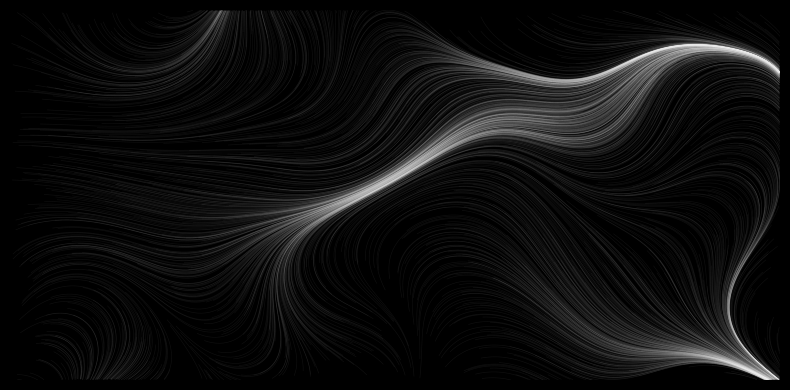

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
from tqdm.notebook import tqdm

# Parameters
width, height = 800, 400
scale = 500
step = 2
length = 300
octaves = 2
alpha = 0.06
line_color = 'white'
range_points = 2000

# Set up noise
noise = PerlinNoise(octaves=octaves, seed=1)

# Create a figure
fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set plot limits and remove padding
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('auto')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Draw flow lines (random starting points)
for _ in tqdm(range(range_points), desc="Generating lines"):
    x, y = np.random.rand() * width, np.random.rand() * height
    points_x, points_y = [], []
    for _ in range(length):
        angle = noise([x / scale, y / scale]) * 2 * np.pi
        x += np.cos(angle) * step
        y += np.sin(angle) * step
        if not (0 <= x < width and 0 <= y < height):
            break
        points_x.append(x)
        points_y.append(y)
    ax.plot(points_x, points_y, color=line_color, alpha=alpha, linewidth=0.5)

ax.axis('off')
plt.tight_layout()
plt.show()


In [18]:
# Save to disk
# fig.savefig("renders/perlin_flow_02.png", dpi=300, bbox_inches='tight', pad_inches=0)